In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv("insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Our aim here is to predict patients medical  costs given variables like age, sex  and etc ,
regression analysis checks the relationship and correlation between  independent variables and use 
the preditors or covariates to predict the  dependent variable (often called outcome or response )but in our case the dependent variable is 
charges . 

ABSTRACT:
    -perform a well curated analysis from the above data 
    - use the independent variables to create a regression model to predict the dependent variable
    -present the analysis through an article
    -save model for production

In [36]:
# data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
#checking and converting these variables to category
print("sex")
print(*list(data.sex.unique()))
print("smoker")
print(*list(data.smoker.unique()))
print("region")
print(*list(data.region.unique()))

sex
female male
smoker
yes no
region
southwest southeast northwest northeast


In [38]:
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [39]:
# lets check again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [40]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data's summary statistics

In [41]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

From the summary above we deduce that maximum amount charged to a patient is 63770.428010 and the minimum is 1121.873900.
The age range is between 18 years and 64 and the maximum number of children per patient is 0 - 5 children.
Lastly the maximum body mass index (BMI) is 53 and the lowest is 15.

# Preprocessing and visualization

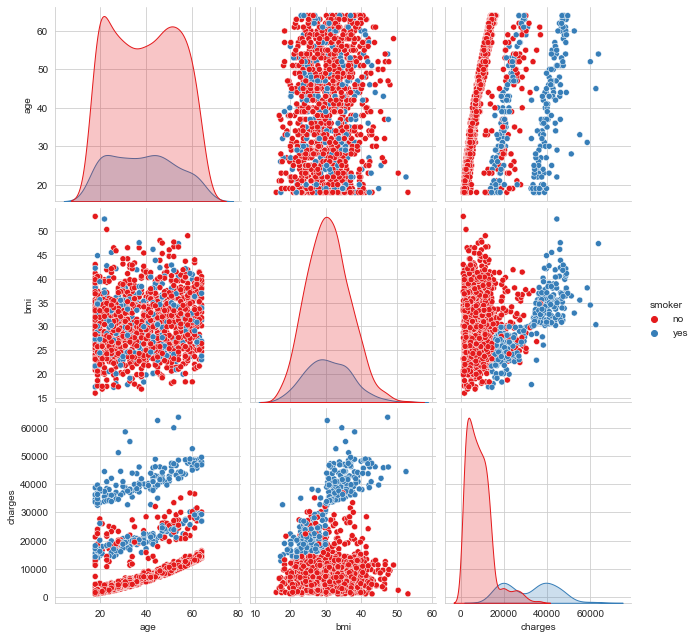

In [17]:
sns.set_style("whitegrid")
sns.pairplot(data[["age", "bmi", "charges", "smoker"]],
            hue = "smoker",
            height = 3,
            palette="Set1")

<AxesSubplot:>

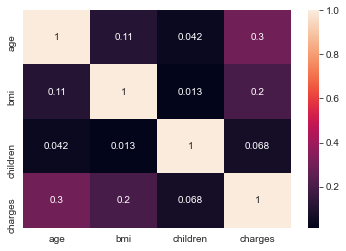

In [18]:
# lets check for correlation between variables
sns.heatmap(data.corr(), annot = True)

As we can see from the heatmap our variables have some degree of correlation
but i won't be dropping or removing variables because we have less features to train the model

# spliting data between x and y

In [54]:
x = data.iloc[:,0:6]
y = data.iloc[:, -1]

In [55]:
x

age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]

In [56]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# One hot encoding

One hot encoding is a process of tranforming data to prepare for the machine learning
algorithm. with OHE we convert each categorical value into a new column and assign a binary value
of 1 or 0 to those columns for example: varible region contains south west , south east, north east and nothwest , hence we convert them into binary classes of 1 and 0

In [57]:
from sklearn.preprocessing import OneHotEncoder

# perform one hot encoding on   sex , region and smoker
encoded_data = pd.get_dummies(x, columns = ['sex', 'region','smoker'])
encoded_data.head()


age     bmi  children  sex_female  sex_male  region_northeast  \
0   19  27.900         0           1         0                 0   
1   18  33.770         1           0         1                 0   
2   28  33.000         3           0         1                 0   
3   33  22.705         0           0         1                 0   
4   32  28.880         0           0         1                 0   

   region_northwest  region_southeast  region_southwest  smoker_no  smoker_yes  
0                 0                 0                 1          0           1  
1                 0                 1                 0          1           0  
2                 0                 1                 0          1           0  
3                 1                 0                 0          1           0  
4                 1                 0                 0          1           0

# Scalling the data

In [63]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = encoded_data.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(encoded_data)
x = pd.DataFrame(scaler.transform(encoded_data))
x.columns = features

In [64]:
x

age       bmi  children  sex_female  sex_male  region_northeast  \
0     0.021739  0.321227       0.0         1.0       0.0               0.0   
1     0.000000  0.479150       0.2         0.0       1.0               0.0   
2     0.217391  0.458434       0.6         0.0       1.0               0.0   
3     0.326087  0.181464       0.0         0.0       1.0               0.0   
4     0.304348  0.347592       0.0         0.0       1.0               0.0   
...        ...       ...       ...         ...       ...               ...   
1333  0.695652  0.403820       0.6         0.0       1.0               0.0   
1334  0.000000  0.429379       0.0         1.0       0.0               1.0   
1335  0.000000  0.562012       0.0         1.0       0.0               0.0   
1336  0.065217  0.264730       0.0         1.0       0.0               0.0   
1337  0.934783  0.352704       0.0         1.0       0.0               0.0   

      region_northwest  region_southeast  region_southwest  smoker_no  \
0                  0.0               0.0               1.0        0.0   
1                  0.0               1.0               0.0        1.0   
2                  0.0               1.0               0.0        1.0   
3                  1.0               0.0               0.0        1.0   
4                  1.0               0.0               0.0        1.0   
...                ...               ...               ...        ...   
1333               1.0               0.0               0.0        1.0   
1334               0.0               0.0               0.0        1.0   
1335               0.0               1.0               0.0        1.0   
1336               0.0               0.0               1.0        1.0   
1337               1.0               0.0               0.0        0.0   

      smoker_yes  
0            1.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
1333         0.0  
1334         0.0  
1335         0.0  
1336         0.0  
1337         1.0  

[1338 rows x 11 columns]

#        Splitting data into training and testing sets

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.80, random_state=1)

In [67]:
x_train

age       bmi  children  sex_female  sex_male  region_northeast  \
216   0.760870  0.286252       0.0         1.0       0.0               0.0   
731   0.760870  0.146355       0.2         0.0       1.0               0.0   
866   0.000000  0.573850       0.0         0.0       1.0               0.0   
202   0.913043  0.217245       0.0         1.0       0.0               0.0   
820   0.586957  0.477267       0.2         0.0       1.0               0.0   
...        ...       ...       ...         ...       ...               ...   
715   0.913043  0.348130       0.0         0.0       1.0               0.0   
905   0.173913  0.360371       0.4         1.0       0.0               1.0   
1096  0.717391  0.511165       0.4         1.0       0.0               1.0   
235   0.478261  0.168415       0.4         1.0       0.0               0.0   
1061  0.847826  0.322303       0.2         0.0       1.0               0.0   

      region_northwest  region_southeast  region_southwest  smoker_no  \
216                1.0               0.0               0.0        1.0   
731                0.0               0.0               1.0        1.0   
866                0.0               1.0               0.0        1.0   
202                1.0               0.0               0.0        1.0   
820                0.0               0.0               1.0        1.0   
...                ...               ...               ...        ...   
715                0.0               0.0               1.0        1.0   
905                0.0               0.0               0.0        1.0   
1096               0.0               0.0               0.0        0.0   
235                0.0               1.0               0.0        0.0   
1061               0.0               1.0               0.0        1.0   

      smoker_yes  
216          0.0  
731          0.0  
866          0.0  
202          0.0  
820          0.0  
...          ...  
715          0.0  
905          0.0  
1096         1.0  
235          1.0  
1061         0.0  

[1070 rows x 11 columns]

In [68]:
x_test

age       bmi  children  sex_female  sex_male  region_northeast  \
559   0.021739  0.526500       0.0         0.0       1.0               0.0   
1087  0.847826  0.419155       0.0         0.0       1.0               0.0   
1020  0.717391  0.566048       0.0         0.0       1.0               0.0   
460   0.673913  0.556094       0.6         1.0       0.0               0.0   
802   0.065217  0.170568       0.2         0.0       1.0               0.0   
...        ...       ...       ...         ...       ...               ...   
682   0.456522  0.520312       0.4         0.0       1.0               0.0   
629   0.565217  0.618510       0.0         1.0       0.0               0.0   
893   0.630435  0.618241       0.4         0.0       1.0               0.0   
807   0.021739  0.554614       0.0         1.0       0.0               0.0   
1165  0.369565  0.273473       0.0         1.0       0.0               1.0   

      region_northwest  region_southeast  region_southwest  smoker_no  \
559                1.0               0.0               0.0        1.0   
1087               1.0               0.0               0.0        1.0   
1020               0.0               0.0               1.0        1.0   
460                0.0               1.0               0.0        1.0   
802                0.0               0.0               1.0        1.0   
...                ...               ...               ...        ...   
682                0.0               0.0               1.0        0.0   
629                1.0               0.0               0.0        0.0   
893                0.0               1.0               0.0        0.0   
807                1.0               0.0               0.0        1.0   
1165               0.0               0.0               0.0        1.0   

      smoker_yes  
559          0.0  
1087         0.0  
1020         0.0  
460          0.0  
802          0.0  
...          ...  
682          1.0  
629          1.0  
893          1.0  
807          0.0  
1165         0.0  

[268 rows x 11 columns]

# Model Development

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [80]:
model = LinearRegression()

In [81]:
model.fit(x_train , y_train)

LinearRegression()

# Apply trained model to make prediction

In [82]:
y_pred = model.predict(x_test)

# Prediction results

# print model perfomance 

In [85]:
print('coefficients :', model.coef_)
print('intercept:',model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

coefficients : [ 11844.55134775  11954.68575461   2040.30510006    121.0765328
   -121.0765328     584.37636275    188.27979919   -453.99951691
   -318.65664503 -11893.24302268  11893.24302268]
intercept: 9658.089967782056
Mean squared error (MSE): 35479352.81
Coefficient of determination (R^2): 0.76


In [86]:
pd.DataFrame(model.coef_, x.columns, columns=["Coeff"])

Coeff
age               11844.551348
bmi               11954.685755
children           2040.305100
sex_female          121.076533
sex_male           -121.076533
region_northeast    584.376363
region_northwest    188.279799
region_southeast   -453.999517
region_southwest   -318.656645
smoker_no        -11893.243023
smoker_yes        11893.243023

# string formatting

by default r2_score returns a floating number

In [88]:
r2_score(y_test, y_pred)

0.7623311844057113

In [89]:
r2_score(y_test,y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [90]:
'%f' % 0.7623311844057113

'0.762331'

We will now round it off to 2 digits

In [91]:
'%.2f' %0.7623311844057113

'0.76'

# scatter plots

In [92]:
import seaborn as sns

# Make scatter plot

the data

In [94]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

In [95]:
import numpy as np
np.array(y_test)

array([ 1646.4297 , 11353.2276 ,  8798.593  , 10381.4787 ,  2103.08   ,
       38746.3551 ,  9304.7019 , 11658.11505,  3070.8087 , 19539.243  ,
       12629.8967 , 11538.421  ,  6338.0756 ,  7050.642  ,  1137.4697 ,
        8968.33   , 21984.47061,  6414.178  , 28287.89766, 13462.52   ,
        9722.7695 , 40932.4295 ,  8026.6666 ,  8444.474  ,  2203.47185,
        6664.68595,  8606.2174 ,  8283.6807 ,  5375.038  ,  3645.0894 ,
       11674.13   , 11737.84884, 24873.3849 , 33750.2918 , 24180.9335 ,
        9863.4718 , 36837.467  , 17942.106  , 11856.4115 , 39725.51805,
        4349.462  , 11743.9341 , 19749.38338, 12347.172  ,  4931.647  ,
       30259.99556, 27724.28875, 34672.1472 ,  9644.2525 , 14394.39815,
       12557.6053 , 11881.358  ,  2352.96845,  9101.798  , 17178.6824 ,
        3994.1778 , 40941.2854 , 12644.589  , 22395.74424,  1149.3959 ,
        3366.6697 , 13143.33665, 18328.2381 ,  2690.1138 , 12741.16745,
        8765.249  , 10264.4421 , 22192.43711,  2709.24395, 14571

In [96]:
y_pred

array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757, 32117.58400779, 12919.04237221, 12318.62183013,
        3784.29145555, 29468.45725408, 11002.8139431 , 17539.69473777,
        8681.35471964,  8349.04325528,  3130.12725504, 10445.83896118,
        3863.74357865,  6944.62510786, 15009.63121084, 14441.59911874,
       12543.65768867, 32958.72553095,  9072.63608136,  8986.85860053,
        3022.85773294,  8164.97136102,  9556.07558002, 10743.20363927,
        7694.01743692,  4373.43771674, 14140.93557984,  5811.78545062,
       34631.91316718, 27009.11191231, 33348.14098668,  9532.96786929,
       30421.65017927, 26648.91186842, 15157.78333287, 33895.76121465,
        6303.38552088, 14059.15156303, 10713.4467824 , 15089.36171493,
        4187.95334069, 13106.4297513 ,  4336.19603407, 28607.05556216,
        7243.57117377, 14269.4643165 , 13282.36924936, 12329.61280721,
        1851.87215658,  8876.2837892 , 26089.18341811, 10125.8221046 ,
      

# making a scatter plot

<AxesSubplot:xlabel='charges'>

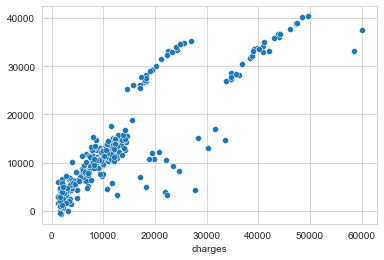

In [97]:
sns.scatterplot(y_test, y_pred)

<AxesSubplot:xlabel='charges'>

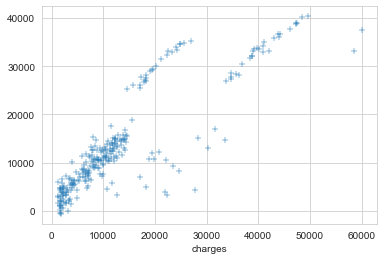

In [98]:
sns.scatterplot(y_test, y_pred, marker="+")

<AxesSubplot:xlabel='charges'>

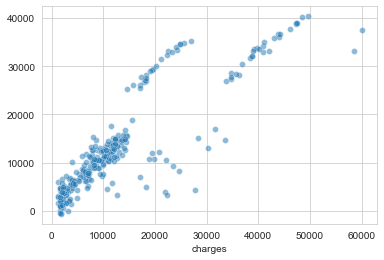

In [100]:
sns.scatterplot(y_test, y_pred, alpha=0.5)